In [4]:
from konlpy.tag import Okt
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
import pandas as pd

In [24]:
stopwords=nltk.corpus.stopwords.words('english')
def text_clearing(text):
    eng=re.compile('[^ a-z A-Z 0-9]+')
    #지정한 정규식에 해당하지 않은 것은 길이가 0인 문자열로 반환한다.
    result=eng.sub('',text)
    return result
def get_pos (x) :
    token=nltk.word_tokenize(x)
    pos = nltk.pos_tag(token)
    
    # 단어와 품사를 합쳐서 하나의 단어로 만들어준다.
    result = []
    
    # 형태소의 수만큼 반복한다.
    # 조사인 것과 명사인 것이 같을 수 있기 때문에 구분해준다.
    # 형태소 벡터를 만들때 추후 사용
    for a1 in pos :
        if a1[0] not in stopwords:
            result.append(f'{a1[0]}/{a1[1]}')
    
    return result
#texts=nltk.word_tokenize("I am going to Seoul, Korea.")
#print(nltk.pos_tag(texts))

In [25]:
df=pd.read_csv('N Seoul Tower.csv')

In [26]:
df

,Unnamed: 0,STAR,CONTENT
0,0,5.0,Seoul tower is very peacfull and one of clean ...
1,1,4.0,We have walked up and down It is a good walk ...
2,2,4.0,It was a bit late to open and it was raining ...
3,3,5.0,It was nice to be able to see the beautiful n...
4,4,5.0,Got there at dusk By the time we got into the ...
...,...,...,...
5503,5503,3.0,when I visit here there is no cherry blossoms ...
5504,5504,4.0,It gives a beautiful view of the city. It is b...
5505,5505,4.0,"great view from the observatory, yet Tokyo tow..."
5506,5506,5.0,There are good trails around here and amazing ...


In [27]:
df["CONTENT"]=df["CONTENT"].apply(lambda x:text_clearing(x))

In [28]:
index_vectorizer=CountVectorizer(tokenizer=lambda x:get_pos(x))
X=index_vectorizer.fit_transform(df["CONTENT"].tolist())
X

<5508x14896 sparse matrix of type '<class 'numpy.int64'>'
	with 171525 stored elements in Compressed Sparse Row format>

In [29]:
index_vectorizer.vocabulary_

{'seoul/NN': 11282,
 'tower/NN': 13348,
 'peacfull/JJ': 9473,
 'one/CD': 8979,
 'clean/JJ': 2669,
 'place/NN': 9714,
 'visit/NN': 14089,
 'life/NN': 7314,
 'beautiful/JJ': 1594,
 'city/NN': 2635,
 'view/NN': 14027,
 'fantastic/JJ': 4813,
 'gardens/NNS': 5363,
 'trees/NNS': 13518,
 'highly/RB': 5994,
 'suggest/VB': 12499,
 'visit/VB': 14094,
 'visit/VBP': 14097,
 'seoul/JJ': 11281,
 'must/MD': 8313,
 'add/VB': 710,
 'booking/VBG': 1867,
 'list/NN': 7404,
 'come/VBP': 2878,
 'love/VB': 7599,
 'spend/VB': 12042,
 'time/NN': 13141,
 'walked/VBN': 14221,
 'good/JJ': 5535,
 'walk/NN': 14205,
 'side/NN': 11551,
 'stairs/NN': 12175,
 'path/NN': 9430,
 'forest/JJS': 5153,
 'visibility/NN': 14080,
 'bit/NN': 1762,
 'poor/JJ': 9869,
 'expected/VBN': 4659,
 'cloudy/NN': 2772,
 'weather/NN': 14366,
 'late/JJ': 7168,
 'open/VB': 9025,
 'raining/VBG': 10354,
 'hard/JJ': 5811,
 'wait/VB': 14187,
 'outside/JJ': 9161,
 'still/RB': 12313,
 'nice/JJ': 8600,
 'able/JJ': 619,
 'see/VB': 11207,
 'night/NN': 

In [32]:
count_list = X.toarray().sum(axis=0)
count_list

array([3, 1, 6, ..., 1, 1, 1], dtype=int64)

In [34]:
# 각 단어의 리뷰별 등장 횟수
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
X.shape

(5508, 14896)

In [36]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
tf_idf_vect = tfidf_vectorizer.fit_transform(X)

In [37]:
print(tf_idf_vect.shape)

(5508, 14896)


In [38]:
# 첫 번째 리뷰에서의 단어 중요도(TF-IDF 값) -- 0이 아닌 것만 출력
print(tf_idf_vect[0])

  (0, 14097)	0.2098262825139298
  (0, 14094)	0.122430757734026
  (0, 14089)	0.13822718886446572
  (0, 14027)	0.06796413159126279
  (0, 13518)	0.1844416672326723
  (0, 13348)	0.06031606854790199
  (0, 13141)	0.10442581099573818
  (0, 12499)	0.23416067562244589
  (0, 12042)	0.18722107425393605
  (0, 11282)	0.07250687929147867
  (0, 11281)	0.1468806238035829
  (0, 9714)	0.19313266525934916
  (0, 9473)	0.3569054088742604
  (0, 8979)	0.11680457492410212
  (0, 8313)	0.12986197565077212
  (0, 7599)	0.1849823156143754
  (0, 7404)	0.2459814221232007
  (0, 7314)	0.24017307153470308
  (0, 5994)	0.19445775730138778
  (0, 5363)	0.26283306565933534
  (0, 4813)	0.183644151693561
  (0, 2878)	0.20505786323704756
  (0, 2669)	0.21244207484693817
  (0, 2635)	0.08763894569665466
  (0, 1867)	0.31295281901653044
  (0, 1594)	0.12152914501003481
  (0, 710)	0.23705403519018078


In [39]:
# 첫 번째 리뷰에서 모든 단어의 중요도 -- 0인 값까지 포함
print(tf_idf_vect[0].toarray().shape)
print(tf_idf_vect[0].toarray())

(1, 14896)
[[0. 0. 0. ... 0. 0. 0.]]


<AxesSubplot:>

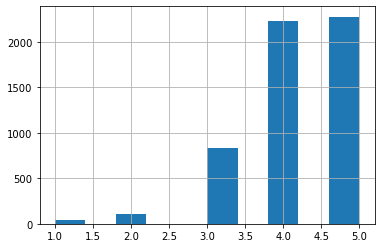

In [40]:
import matplotlib.pyplot as plt
df['STAR'].hist()

In [43]:
def rating_to_label(star):
    if star > 3:
        return 1
    else:
        return 0
    
df['y'] = df['STAR'].apply(lambda x: rating_to_label(x))
df["y"].value_counts()

1    4515
0     993
Name: y, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split

x = tf_idf_vect
y = df['y']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [71]:
x_train.shape, y_train.shape

((3855, 14896), (3855,))

In [72]:
x_test.shape, y_test.shape

((1653, 14896), (1653,))

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# fit in training set
lr = LogisticRegression(random_state = 0)
lr.fit(x_train, y_train)

# predict in test set
y_pred = lr.predict(x_test)


In [74]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.83
precision: 0.83
recall: 1.00
F1: 0.91


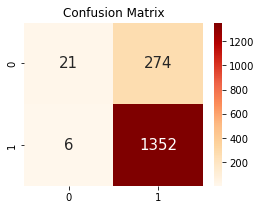

In [75]:
# confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()


In [51]:
df['y'].value_counts()

1    4515
0     993
Name: y, dtype: int64

In [52]:
positive_random_idx = df[df['y']==1].sample(993, random_state=12).index.tolist()
negative_random_idx = df[df['y']==0].sample(993, random_state=12).index.tolist()

In [53]:
random_idx = positive_random_idx + negative_random_idx
x = tf_idf_vect[random_idx]
y = df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [54]:
x_train.shape, y_train.shape

((1489, 14896), (1489,))

In [55]:
x_test.shape, y_test.shape

((497, 14896), (497,))

In [56]:
lr2 = LogisticRegression(random_state = 0)
lr2.fit(x_train, y_train)
y_pred = lr2.predict(x_test)

In [57]:
# classification result for test set

print('accuracy: %.2f' % accuracy_score(y_test, y_pred))
print('precision: %.2f' % precision_score(y_test, y_pred))
print('recall: %.2f' % recall_score(y_test, y_pred))
print('F1: %.2f' % f1_score(y_test, y_pred))


accuracy: 0.69
precision: 0.68
recall: 0.71
F1: 0.70


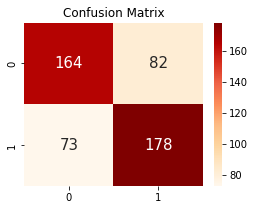

In [58]:
# confusion matrix

from sklearn.metrics import confusion_matrix

confu = confusion_matrix(y_true = y_test, y_pred = y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(confu, annot=True, annot_kws={'size':15}, cmap='OrRd', fmt='.10g')
plt.title('Confusion Matrix')
plt.show()

In [59]:
lr2.coef_

array([[ 0.        ,  0.        ,  0.18916027, ..., -0.07546524,
         0.        ,  0.        ]])

<BarContainer object of 14896 artists>

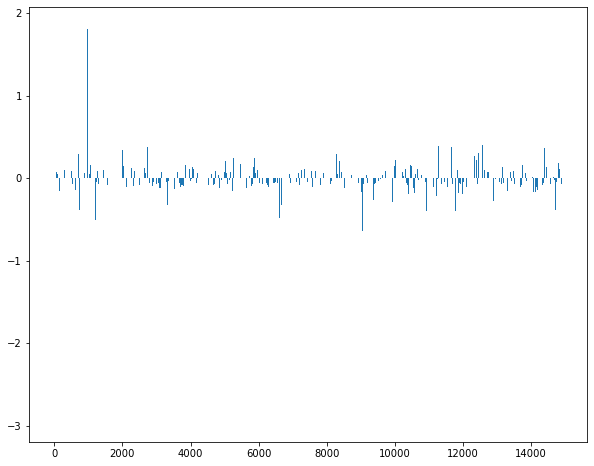

In [60]:
# print logistic regression's coef

plt.figure(figsize=(10, 8))
plt.bar(range(len(lr2.coef_[0])), lr2.coef_[0])

In [61]:
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)[-5:])
# enumerate: 인덱스 번호와 컬렉션의 원소를 tuple형태로 반환함

[(1.8364802932697994, 1594), (1.8041311855070759, 974), (1.635163305379445, 14057), (1.4879912490062075, 11282), (1.4830331162109398, 2635)]
[(-1.187309734740422, 6199), (-1.5365410998702338, 1713), (-1.5969862155524723, 8269), (-1.905545908123931, 8268), (-2.955679817800143, 8746)]


In [62]:
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = True)
coef_neg_index = sorted(((value, index) for index, value in enumerate(lr2.coef_[0])), reverse = False)
coef_pos_index

[(1.8364802932697994, 1594),
 (1.8041311855070759, 974),
 (1.635163305379445, 14057),
 (1.4879912490062075, 11282),
 (1.4830331162109398, 2635),
 (1.444014433640615, 5606),
 (1.3649278570535595, 972),
 (1.2654071021108872, 12022),
 (1.2548934336409805, 9714),
 (1.2075432818536627, 950),
 (1.1782959215671267, 7461),
 (1.0842352210980266, 10483),
 (1.0294818360974076, 8313),
 (1.024150335171893, 12458),
 (1.0092288660241489, 7607),
 (0.99207701324225, 4169),
 (0.9884838640543382, 14205),
 (0.9860093634849139, 8629),
 (0.9773861467668329, 7602),
 (0.9576854262283429, 4572),
 (0.9277030980165502, 12551),
 (0.920535801888736, 5994),
 (0.9005848916864075, 7596),
 (0.8754895604227725, 1181),
 (0.8570065918347418, 11466),
 (0.8497772879007544, 4373),
 (0.8042016634426119, 2152),
 (0.7946412387597592, 5302),
 (0.791726408588355, 1439),
 (0.7908698935400543, 7712),
 (0.7887273753825772, 7599),
 (0.7828320642961579, 14618),
 (0.7785702228055849, 3224),
 (0.76983653470165, 5503),
 (0.7377524432515

In [64]:
invert_index_vectorizer = {v: k for k, v in vect.vocabulary_.items()}
invert_index_vectorizer

{11440: ('seoul', 'NN'),
 13545: ('tower', 'NN'),
 6758: ('is', 'VBZ'),
 14214: ('very', 'RB'),
 9623: ('peacfull', 'JJ'),
 1038: ('and', 'CC'),
 9109: ('one', 'CD'),
 9016: ('of', 'IN'),
 2706: ('clean', 'JJ'),
 9864: ('place', 'NN'),
 13101: ('that', 'IN'),
 6374: ('i', 'JJ'),
 14300: ('visit', 'NN'),
 6517: ('in', 'IN'),
 8438: ('my', 'PRP$'),
 7414: ('life', 'NN'),
 1617: ('beautiful', 'JJ'),
 2672: ('city', 'NN'),
 14238: ('view', 'NN'),
 4872: ('fantastic', 'JJ'),
 5429: ('gardens', 'NNS'),
 13715: ('trees', 'NNS'),
 6376: ('i', 'NNS'),
 3961: ('do', 'VBP'),
 6073: ('highly', 'RB'),
 12668: ('suggest', 'VB'),
 15043: ('you', 'PRP'),
 13393: ('to', 'TO'),
 14305: ('visit', 'VB'),
 6028: ('here', 'RB'),
 6415: ('if', 'IN'),
 14308: ('visit', 'VBP'),
 11439: ('seoul', 'JJ'),
 8423: ('must', 'MD'),
 718: ('add', 'VB'),
 9101: ('on', 'IN'),
 15068: ('your', 'PRP$'),
 1899: ('booking', 'VBG'),
 7504: ('list', 'NN'),
 14688: ('when', 'WRB'),
 2915: ('come', 'VBP'),
 13212: ('this', 'DT'

In [65]:
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

('bear', 'JJ') 1.8364802932697994
('altitude', 'NN') 1.8041311855070759
('upside', 'IN') 1.635163305379445
('science', 'NN') 1.4879912490062075
('chuckles', 'NNS') 1.4830331162109398
('goodies', 'NNS') 1.444014433640615
('although', 'IN') 1.3649278570535595
('soeul', 'NN') 1.2654071021108872
('petite', 'JJ') 1.2548934336409805
('alongits', 'NNS') 1.2075432818536627
('like', 'VB') 1.1782959215671267
('rachelle', 'VB') 1.0842352210980266
('morningsbut', 'NN') 1.0294818360974076
('step', 'NN') 1.024150335171893
('lol', 'VB') 1.0092288660241489
('dump', 'NN') 0.99207701324225
('vertical', 'NN') 0.9884838640543382
('neat', 'NN') 0.9860093634849139
('lok', 'NN') 0.9773861467668329
('europe', 'VB') 0.9576854262283429


In [66]:
for coef in coef_neg_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

('nightfollowed', 'VBD') -2.955679817800143
('moer', 'NN') -1.905545908123931
('mointaintop', 'NN') -1.5969862155524723
('benches', 'VBP') -1.5365410998702338
('homepage', 'NN') -1.187309734740422
('crazy', 'JJ') -1.1846728712170032
('heaving', 'VBG') -1.1701257414203603
('mething', 'VBG') -1.1680323835628659
('parc', 'NN') -1.1441028309188863
('aussicht', 'IN') -1.0371954532303769
('educated', 'VBN') -1.0059406394662134
('tiring', 'JJ') -0.9943585756108626
('animals', 'NNS') -0.9877186971304048
('letter', 'NN') -0.9848969232595154
('memorabilia', 'NN') -0.9675083336762605
('otherwise', 'VBP') -0.9204979435182092
('overwhelmed', 'VBN') -0.9080947602266959
('cream', 'NN') -0.8698466957863363
('sind', 'NN') -0.8535498548557693
('herded', 'VBN') -0.8502209463275155
